<a href="https://colab.research.google.com/github/jtwang1027/cancer_omics/blob/master/partial_least_squares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.datasets import make_regression

from math import sqrt
# from sklearn.decomposition import PCA

In [0]:
au= pd.read_csv('/content/drive/My Drive/hcc1599.csv') # read in data from example cell line

In [0]:
au.dropna(axis=1, inplace=True)
encoded=pd.get_dummies(au.treatment, drop_first=True) #one hot encoding on treatments
au=au.join(encoded)
dropcol= ['cellID', 'fileID', 'cell_line','treatment']
au.drop(  dropcol , axis=1, inplace=True)


X= au.drop(['p.STAT5'], axis=1)
y= au['p.STAT5']

In [0]:
scaler=MinMaxScaler()
sub_col=['time','b.CATENIN', 'cleavedCas', 'CyclinB', 'GAPDH', 'IdU', 'Ki.67',
       'p.4EBP1', 'p.Akt.Ser473.', 'p.AKT.Thr308.', 'p.AMPK', 'p.BTK',
       'p.CREB', 'p.ERK', 'p.FAK', 'p.GSK3b', 'p.H3', 'p.HER2', 'p.JNK',
       'p.MAP2K3', 'p.MAPKAPK2', 'p.MEK', 'p.MKK3.MKK6', 'p.MKK4', 'p.NFkB',
       'p.p38', 'p.p53', 'p.p90RSK', 'p.PDPK1', 'p.PLCg2', 'p.RB', 'p.S6',
       'p.S6K', 'p.SMAD23', 'p.SRC', 'p.STAT1', 'p.STAT3']

In [0]:
X[sub_col]=scaler.fit_transform(X[sub_col])

In [0]:
#X.describe()

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state=1234)

In [0]:
#PLS regression object
pls = PLSRegression(n_components=8)
#fit data
pls.fit(X_train, y_train)

In [0]:

feat= pd.DataFrame(zip(X_train.columns,abs(pls.coef_)), columns= ['f','coef']).sort_values(by='coef',ascending=False)

Text(0.5, 1.0, 'PLS top features')

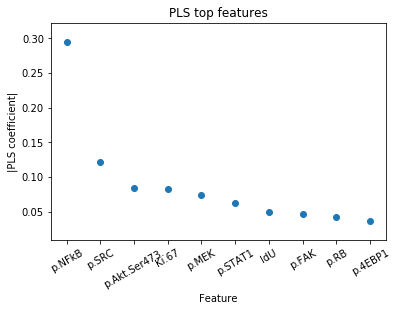

In [49]:
plt.scatter(feat.f[:10],feat.coef[:10])
plt.xlabel('Feature') 
plt.xticks(rotation=30)
plt.ylabel('|PLS coefficient|')
plt.title('PLS top features')

In [83]:
#additional visualization using correlation plot with top 5 features
top= list(feat.f[:3])
top.extend(['p.STAT5'])

top

['p.NFkB', 'p.SRC', 'p.Akt.Ser473.', 'p.STAT5']

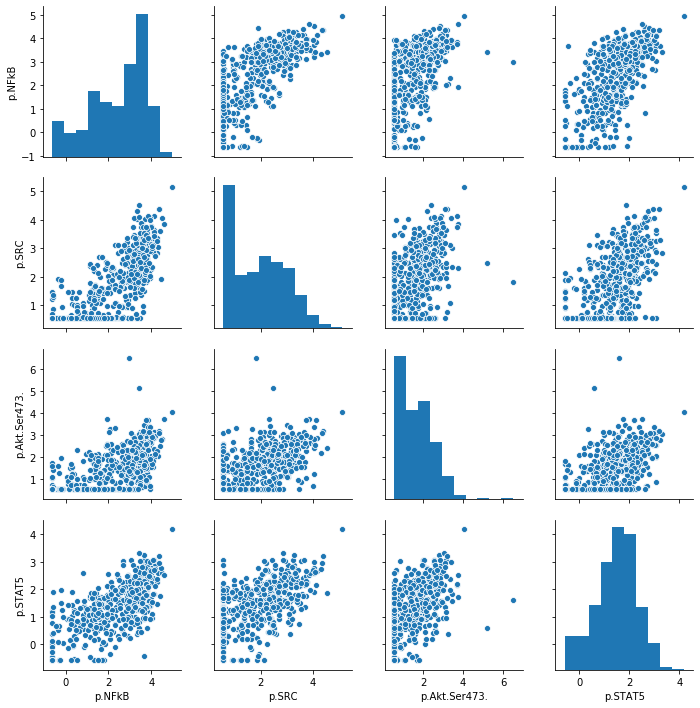

In [84]:
sns.pairplot(au.loc[:500,top] )

From this pairplot we can confirm that our predicted (y) column p.STAT5 (bottom row) does indeed show strong correlation with p.NFKB  and p.SRC

In [51]:
print('Prediction MSE using PLS regression: ' + str (sqrt(mean_squared_error(pls.predict(X_test), y_test))))

Prediction MSE using PLS regression: 0.6151548724240496
